In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf

from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error,confusion_matrix
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics


from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report

In [2]:
# To read the CSV file using pandas into a DataFrame
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')


In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  object 
 6   FAVC                            20758 non-null  object 
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  object 
 11  CH2O                            20758 non-null  float64
 12  SCC                             

In [4]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13840 entries, 0 to 13839
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              13840 non-null  int64  
 1   Gender                          13840 non-null  object 
 2   Age                             13840 non-null  float64
 3   Height                          13840 non-null  float64
 4   Weight                          13840 non-null  float64
 5   family_history_with_overweight  13840 non-null  object 
 6   FAVC                            13840 non-null  object 
 7   FCVC                            13840 non-null  float64
 8   NCP                             13840 non-null  float64
 9   CAEC                            13840 non-null  object 
 10  SMOKE                           13840 non-null  object 
 11  CH2O                            13840 non-null  float64
 12  SCC                             

In [5]:
# To find missing values in the DataFrame
df_train.isnull().sum()

id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [6]:
# Check for duplicates across all columns in df_train
duplicate_rows_train = df_train[df_train.duplicated()]

# Check if there are any duplicates
if duplicate_rows_train.empty:
    print("No duplicate rows found in training dataframe.")
else:
    print("Duplicate rows found: ", len(duplicate_rows_train))
    

    
# Check for duplicates across all columns in df_test
duplicate_rows_test = df_test[df_test.duplicated()]

# Check if there are any duplicates
if duplicate_rows_test.empty:
    print("No duplicate rows found in testing dataframe.")
else:
    print("Duplicate rows found: ", len(duplicate_rows_train))

No duplicate rows found in training dataframe.
No duplicate rows found in testing dataframe.


In [7]:
print("Train data: ", df_train.shape)
print("Test data: ", df_test.shape)

# To calculate the percentage
df_train_percentage = np.round(df_train.shape[0] / (df_train.shape[0] + df_test.shape[0]), 4)
print(f'Training data is {df_train_percentage * 100}% of all the entries')
print(f'Testing data is {(1 - df_train_percentage) * 100}% of all the entries')

Train data:  (20758, 18)
Test data:  (13840, 17)
Training data is 60.0% of all the entries
Testing data is 40.0% of all the entries


In [8]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
id,20758.0,10378.500000,5992.462780,0.00,5189.250000,10378.500000,15567.750000,20757.000000
Age,20758.0,23.841804,5.688072,14.00,20.000000,22.815416,26.000000,61.000000
Height,20758.0,1.700245,0.087312,1.45,1.631856,1.700000,1.762887,1.975663
Weight,20758.0,87.887768,26.379443,39.00,66.000000,84.064875,111.600553,165.057269
FCVC,20758.0,2.445908,0.533218,1.00,2.000000,2.393837,3.000000,3.000000
NCP,20758.0,2.761332,0.705375,1.00,3.000000,3.000000,3.000000,4.000000
CH2O,20758.0,2.029418,0.608467,1.00,1.792022,2.000000,2.549617,3.000000
FAF,20758.0,0.981747,0.838302,0.00,0.008013,1.000000,1.587406,3.000000
TUE,20758.0,0.616756,0.602113,0.00,0.000000,0.573887,1.000000,2.000000


In [9]:
# To understand the dataframe more
df_train.describe(include='object').T

,count,unique,top,freq
Gender,20758,2,Female,10422
family_history_with_overweight,20758,2,yes,17014
FAVC,20758,2,yes,18982
CAEC,20758,4,Sometimes,17529
SMOKE,20758,2,no,20513
SCC,20758,2,no,20071
CALC,20758,3,Sometimes,15066
MTRANS,20758,5,Public_Transportation,16687
NObeyesdad,20758,7,Obesity_Type_III,4046


In [10]:
df_train['NObeyesdad'].value_counts()

Obesity_Type_III       4046
Obesity_Type_II        3248
Normal_Weight          3082
Obesity_Type_I         2910
Insufficient_Weight    2523
Overweight_Level_II    2522
Overweight_Level_I     2427
Name: NObeyesdad, dtype: int64

In [11]:
# Data Visualization

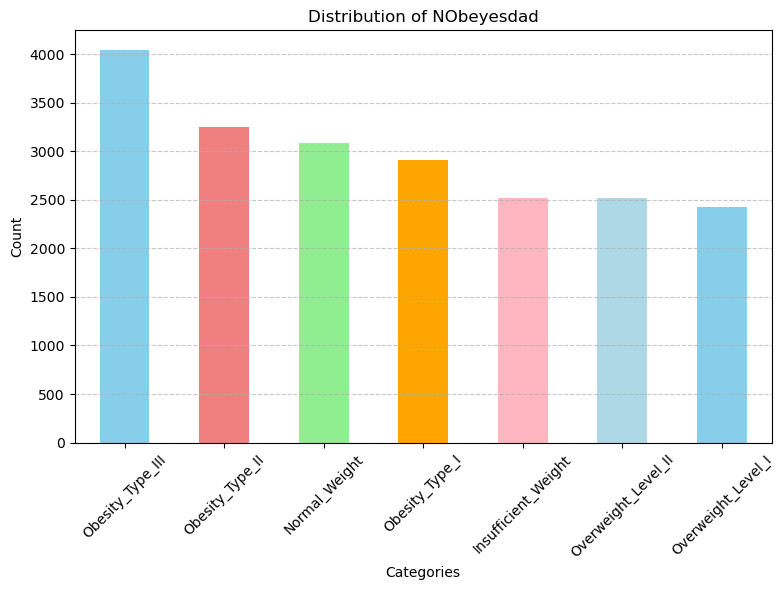

In [12]:
# Plotting the bar chart for the column 'NObeyesdad'
categories = df_train['NObeyesdad'].value_counts().index
colors = ['skyblue', 'lightcoral', 'lightgreen', 'orange', 'lightpink', 'lightblue']

plt.figure(figsize=(8, 6))
df_train['NObeyesdad'].value_counts().plot(kind='bar', color=colors)
plt.title('Distribution of NObeyesdad')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.xticks(range(len(categories)), categories, rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

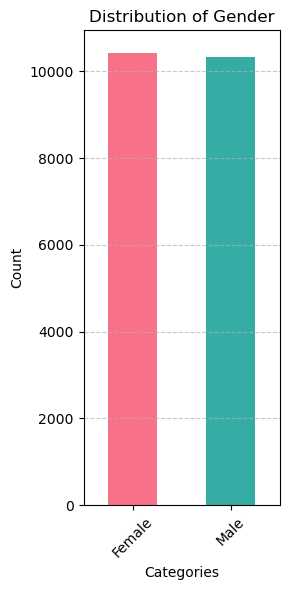

In [13]:
# Plotting the bar chart for the column 'Gender'
gender_counts = df_train['Gender'].value_counts()
colors = sns.color_palette('husl', n_colors=len(gender_counts))

plt.figure(figsize=(3, 6))
gender_counts.plot(kind='bar', color=colors)
plt.title('Distribution of Gender')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

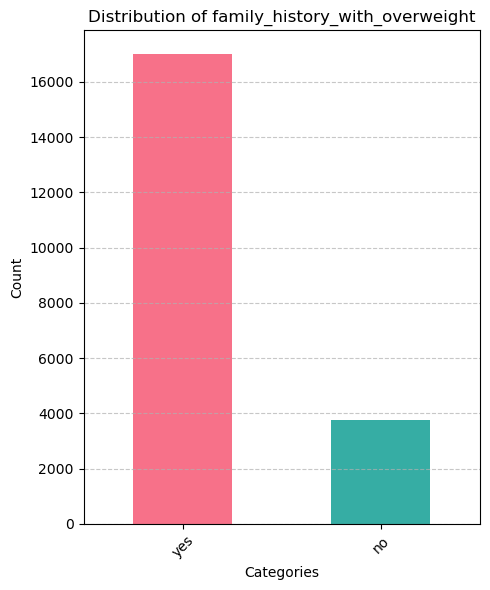

In [14]:
# Plotting the bar chart for the column 'family_history_with_overweight'
colors = sns.color_palette('husl', n_colors=len(gender_counts))
plt.figure(figsize=(5, 6))
df_train['family_history_with_overweight'].value_counts().plot(kind='bar', color=colors)
plt.title('Distribution of family_history_with_overweight')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



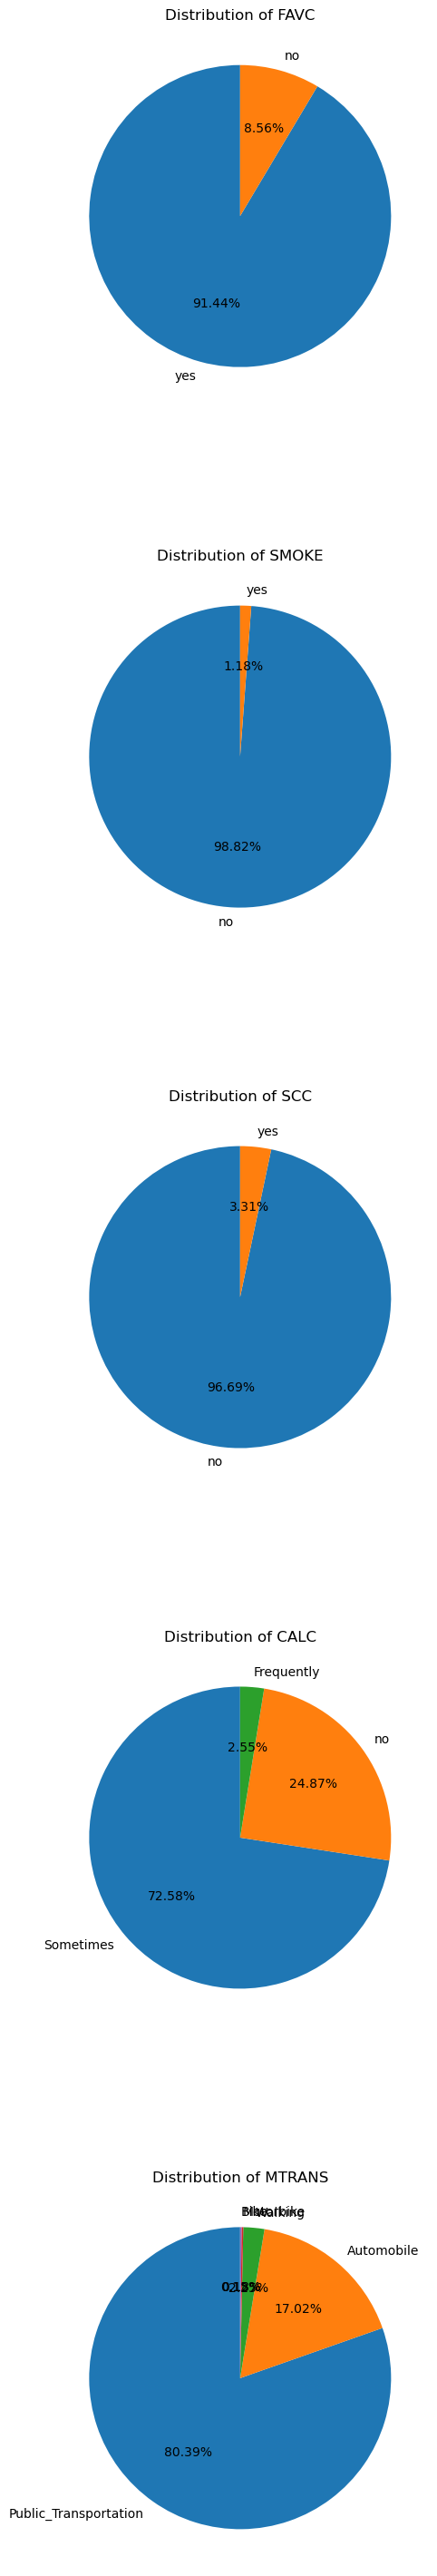

In [15]:
# Define the list of features
features = ['FAVC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']

# Set up the figure size and subplots layout vertically
fig, axes = plt.subplots(nrows=len(features), ncols=1, figsize=(5, 6 * len(features)))

# Iterate over each feature
for i, feature in enumerate(features):
    # Calculate value counts for the feature
    aggregation = df_train[feature].value_counts()
    
    # Plot the pie chart for the current feature
    axes[i].pie(x=aggregation, labels=aggregation.index, autopct='%1.2f%%', startangle=90)
    axes[i].set_title(f'Distribution of {feature}')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


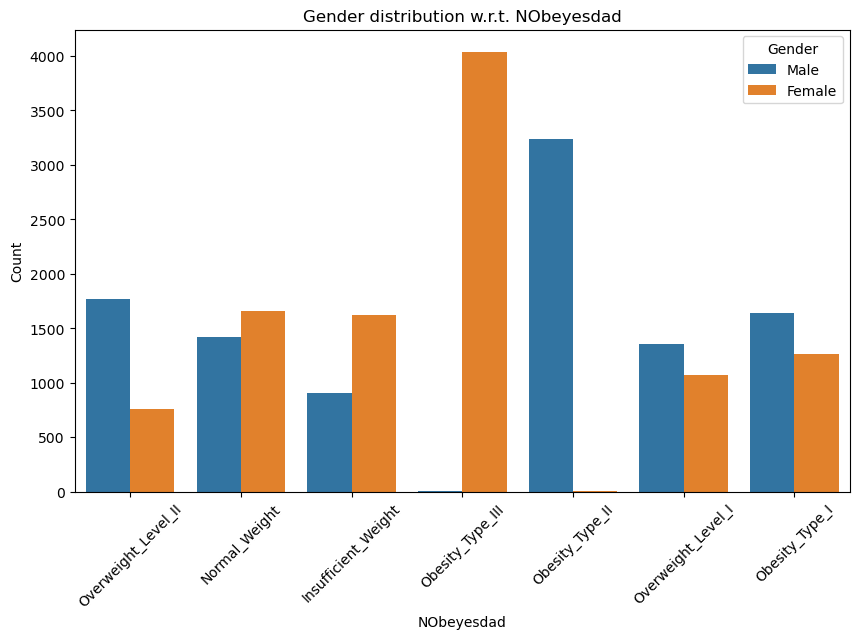

In [16]:
# Create a countplot for NObeyesdad with respect to gender
plt.figure(figsize=(10, 6))
sns.countplot(data=df_train, x='NObeyesdad', hue='Gender', palette=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])
plt.title('Gender distribution w.r.t. NObeyesdad')
plt.xlabel('NObeyesdad')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Gender', loc='upper right')
plt.show()


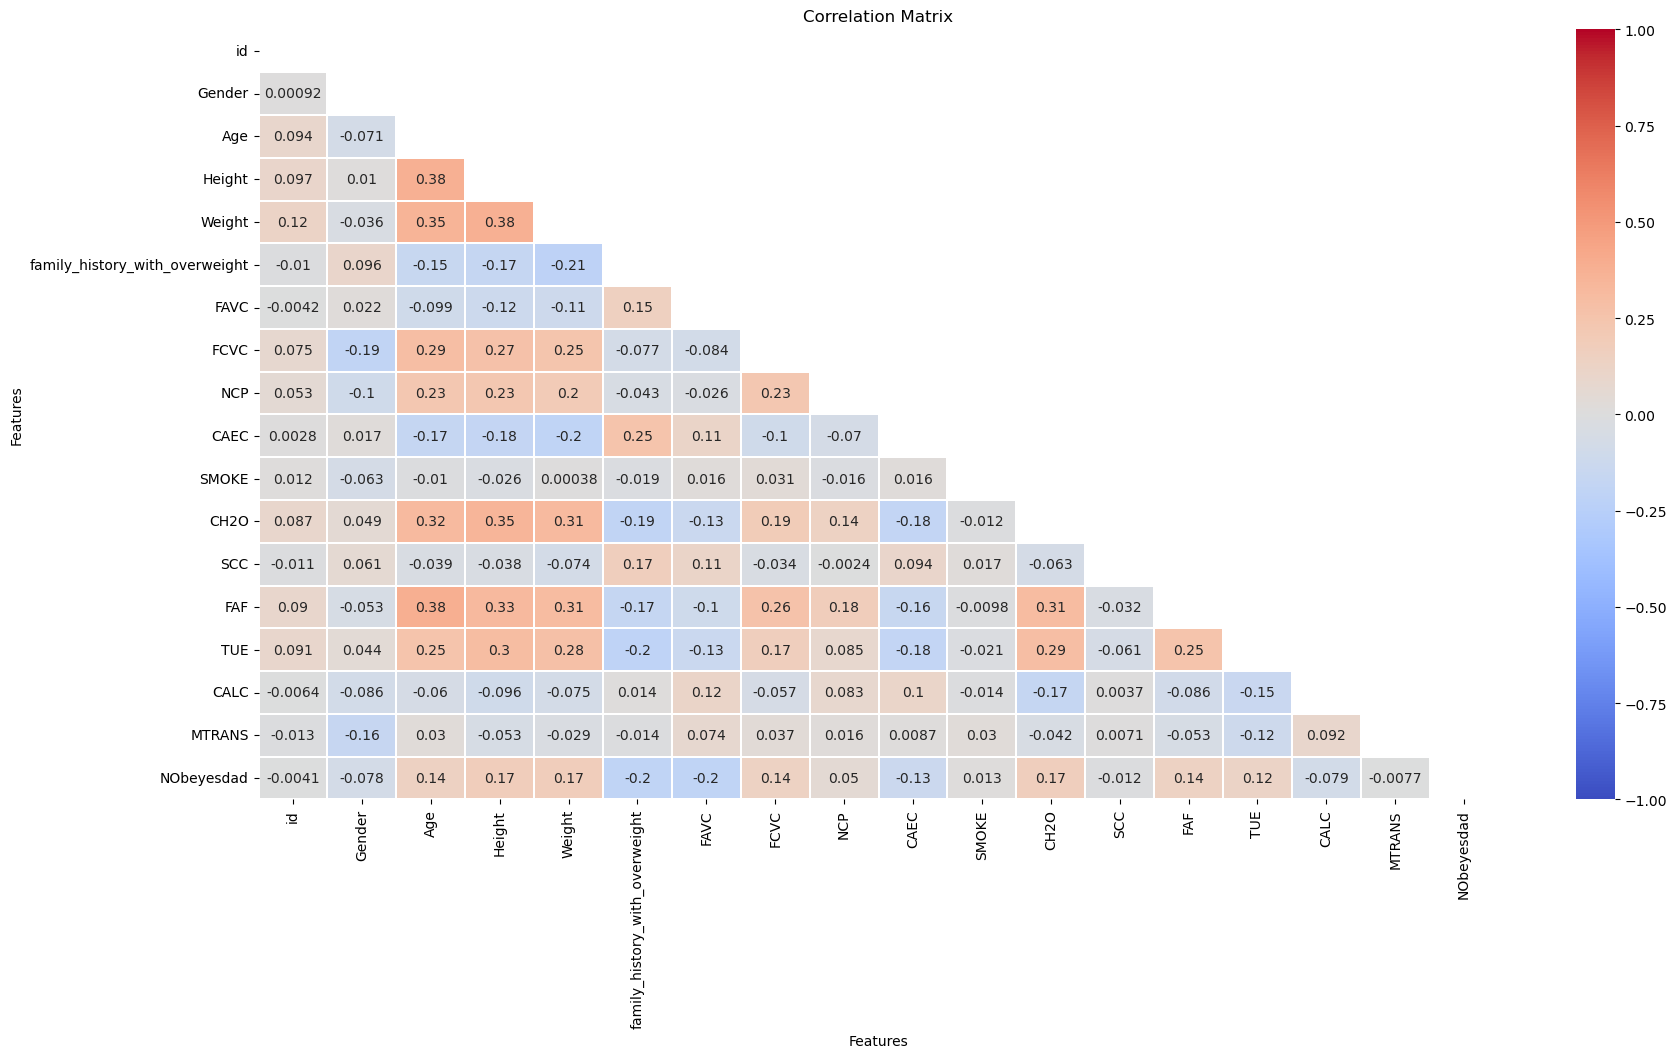

In [17]:
# Set the figure size
plt.figure(figsize=(20, 10))

# Factorize the data and calculate the correlation matrix
factorized_data = df_train.apply(lambda x: pd.factorize(x)[0])
correlation = factorized_data.corr()

# Create a mask for the upper triangle
masking = np.triu(np.ones_like(correlation, dtype=bool))

# Create the heatmap
ax = sns.heatmap(correlation, 
                 mask=masking, 
                 xticklabels=correlation.columns, 
                 yticklabels=correlation.columns, 
                 annot=True, 
                 linewidths=.2, 
                 cmap='coolwarm', 
                 vmin=-1, 
                 vmax=1)

# Set title and labels
ax.set_title('Correlation Matrix')
ax.set_xlabel('Features')
ax.set_ylabel('Features')

# Show the plot
plt.show()

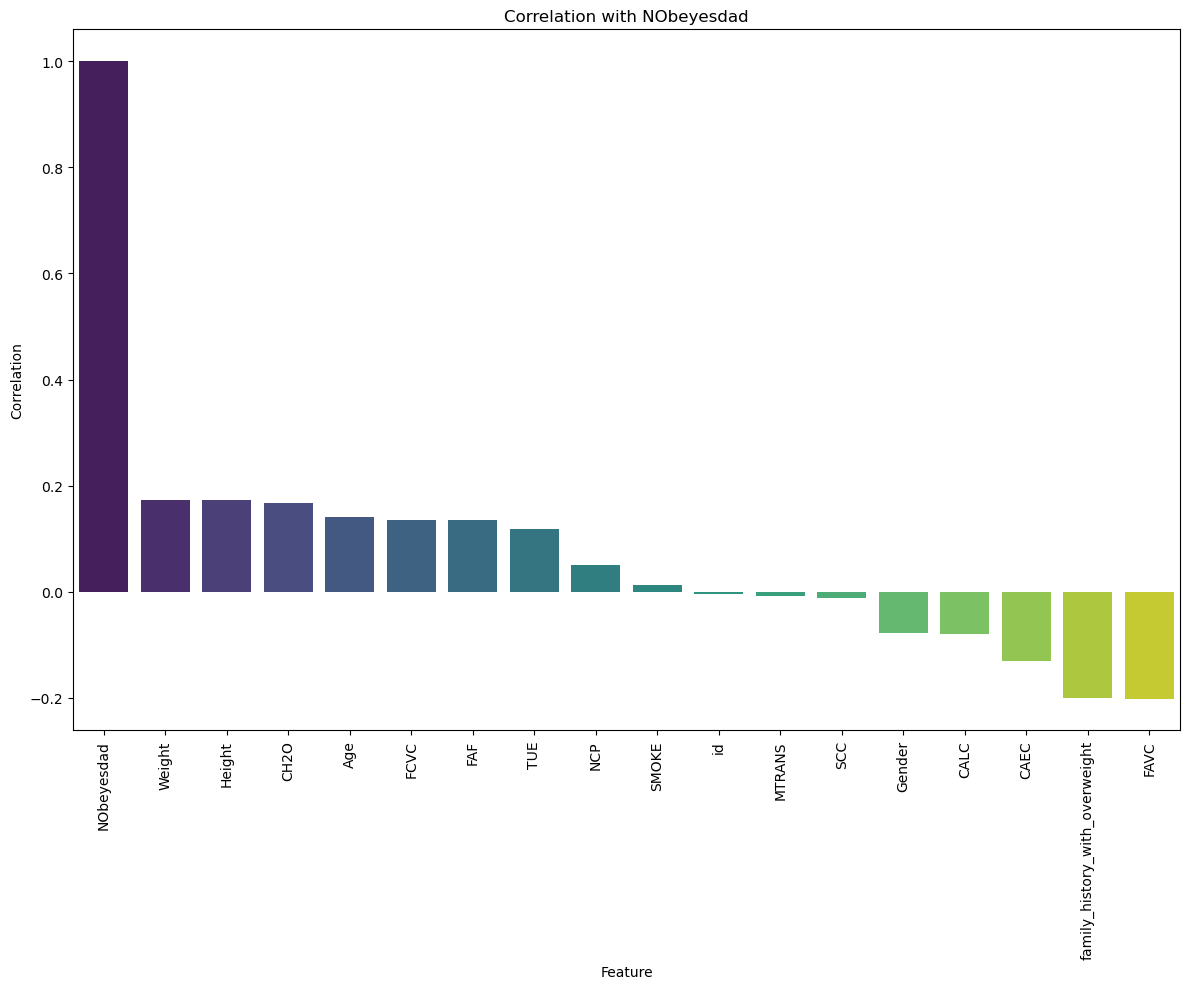

In [18]:
# Sort the correlation values with 'NObeyesdad'
correlation_with_NObeyesdad = correlation['NObeyesdad'].sort_values(ascending=False)

# Set up the figure size and create the bar chart
plt.figure(figsize=(12, 10))

# Plot the bar chart using seaborn
sns.barplot(x=correlation_with_NObeyesdad.index, y=correlation_with_NObeyesdad.values, palette='viridis')

# Set title and labels
plt.title('Correlation with NObeyesdad')
plt.xlabel('Feature')
plt.ylabel('Correlation')
plt.xticks(rotation=90)

# Display the plot
plt.tight_layout()
plt.show()


In [19]:
# Pre-processing

In [20]:
# To drop columns that are not required
df_train = df_train.drop(['id'], axis = 1)
df_train.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [21]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode the target column and store the encoded values
encoded_target = df_train['NObeyesdad'].values

# Iterate over categorical features
for colName in df_train.select_dtypes(include=['O']).columns.tolist():
    # If a feature has only two unique values or if it's the target column
    if df_train[colName].nunique() == 2 or colName == 'NObeyesdad':
        # Encode the feature using LabelEncoder
        df_train[colName] = label_encoder.fit_transform(df_train[colName])
        
        # If the feature is the target column, create a mapping dictionary for decoding
        if colName == 'NObeyesdad':
            label_mapping = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))
    else:
        # Convert the feature to categorical if it has more than two unique values
        df_train[colName] = df_train[colName].astype('category')

# Check data types after encoding
df_train.dtypes


Gender                               int64
Age                                float64
Height                             float64
Weight                             float64
family_history_with_overweight       int64
FAVC                                 int64
FCVC                               float64
NCP                                float64
CAEC                              category
SMOKE                                int64
CH2O                               float64
SCC                                  int64
FAF                                float64
TUE                                float64
CALC                              category
MTRANS                            category
NObeyesdad                           int64
dtype: object

In [22]:
# Identify categorical features in the dataset
categorical_features = df_train.select_dtypes(include='category').columns.tolist()

# Perform one-hot encoding on categorical features
df_train = pd.get_dummies(data=df_train, columns=categorical_features, drop_first=False, dtype='int')

# Split the data into features (X) and the target (y)
X = df_train.drop(columns=['NObeyesdad'])
y = df_train['NObeyesdad']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)



In [23]:
## Random Forests

Accuracy: 0.9005298651252408
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       505
           1       0.86      0.88      0.87       617
           2       0.88      0.90      0.89       582
           3       0.97      0.97      0.97       650
           4       1.00      1.00      1.00       809
           5       0.81      0.72      0.76       485
           6       0.79      0.81      0.80       504

    accuracy                           0.90      4152
   macro avg       0.89      0.89      0.89      4152
weighted avg       0.90      0.90      0.90      4152

Confusion Matrix:
 [[478  26   0   0   0   1   0]
 [ 34 545   1   0   0  28   9]
 [  1   1 521  17   3  10  29]
 [  0   0  19 631   0   0   0]
 [  0   0   1   1 806   1   0]
 [  1  50  12   0   0 350  72]
 [  0  14  37   3   0  42 408]]


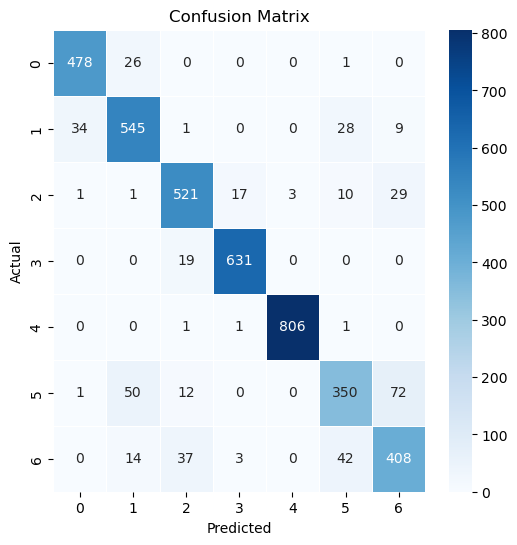

In [24]:
# Instantiate the Random Forest Classifier
rf_class = RandomForestClassifier(n_estimators=1000, random_state=42)

# Train the model using the training data
rf_class.fit(X_train, y_train)

# Make predictions
y_pred_test = rf_class.predict(X_test)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred_test)
print("Accuracy:", accuracy)

classification_rep = classification_report(y_test, y_pred_test)
print(classification_rep)

confusion = confusion_matrix(y_test, y_pred_test)
print("Confusion Matrix:\n", confusion)

plt.figure(figsize=(6, 6))
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", linewidths=.5)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [25]:
# Decision Tree

Decision Tree accuracy is : 0.8424855491329479
              precision    recall  f1-score   support

           0       0.88      0.90      0.89       505
           1       0.81      0.79      0.80       617
           2       0.81      0.82      0.82       582
           3       0.95      0.95      0.95       650
           4       0.99      0.99      0.99       809
           5       0.65      0.64      0.65       485
           6       0.68      0.70      0.69       504

    accuracy                           0.84      4152
   macro avg       0.83      0.83      0.83      4152
weighted avg       0.84      0.84      0.84      4152



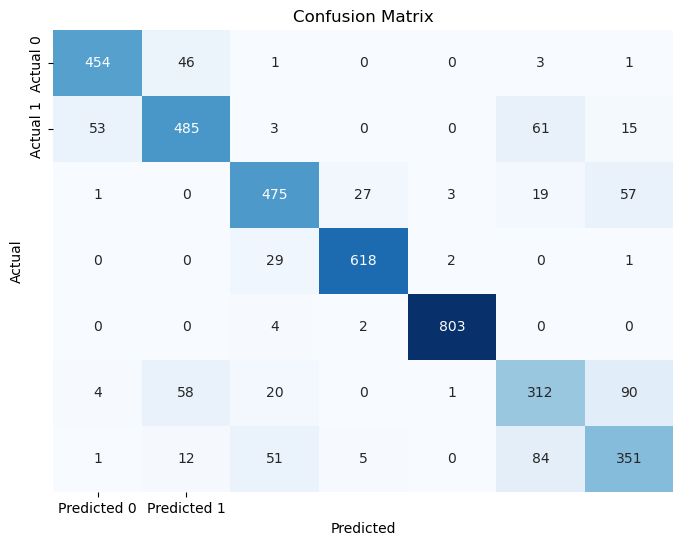

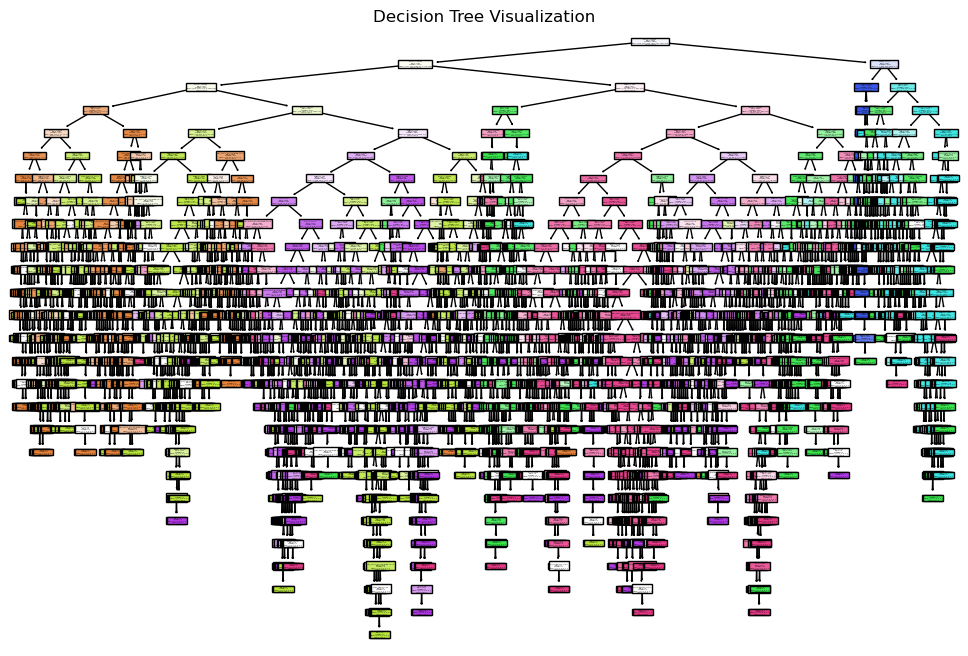

In [26]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Instantiate and train the Decision Tree model
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train,y_train)

# Predict using the trained model
predictdt_y = dt_model.predict(X_test)

# Calculate accuracy
accuracy_dt = dt_model.score(X_test,y_test)
print("Decision Tree accuracy is :",accuracy_dt)
print(classification_report(y_test, predictdt_y))


# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, predictdt_y)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Predicted 0", "Predicted 1"],
            yticklabels=["Actual 0", "Actual 1"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Create and fit the Decision Tree model
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

# Update the class names list based on the unique predicted classes
class_names = [f"Class {i}" for i in np.unique(predictdt_y)]

# Plot the Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(dt_model, filled=True, feature_names=X_train.columns.tolist(), class_names=class_names)
plt.title("Decision Tree Visualization")
plt.show()

In [27]:
# Naive Bayes Classifier

In [28]:
# Naive Bayes Classifier

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Instantiate and train the Gaussian Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Create confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 0.6009152215799615
Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.83      0.67       505
           1       0.49      0.22      0.30       617
           2       0.37      0.44      0.40       582
           3       0.54      0.96      0.69       650
           4       0.96      1.00      0.98       809
           5       0.59      0.24      0.34       485
           6       0.52      0.28      0.36       504

    accuracy                           0.60      4152
   macro avg       0.58      0.57      0.54      4152
weighted avg       0.60      0.60      0.57      4152

Confusion Matrix:
[[417  25  54   0   2   5   2]
 [272 135 106  16  17  41  30]
 [  1  20 255 258   5   8  35]
 [  0   0   9 626   0   4  11]
 [  0   1   0   1 806   1   0]
 [ 38  54 136  79   9 117  52]
 [  8  38 121 176   1  21 139]]


In [29]:
# SGD Classifier model

In [30]:
#SGD Classifier model
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Create and train the SGD Classifier model
sgd_model = SGDClassifier()
sgd_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = sgd_model.predict(X_test)

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate and print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Create and display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.6242774566473989
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.94      0.86       505
           1       0.73      0.08      0.14       617
           2       0.33      0.95      0.49       582
           3       0.96      0.86      0.91       650
           4       1.00      0.98      0.99       809
           5       0.37      0.26      0.31       485
           6       0.34      0.06      0.11       504

    accuracy                           0.62      4152
   macro avg       0.65      0.59      0.54      4152
weighted avg       0.68      0.62      0.58      4152

Confusion Matrix:
[[475   1  17   0   0   3   9]
 [122  47 220   0   0 187  41]
 [  1   1 555  18   3   3   1]
 [  0   0  89 561   0   0   0]
 [  0   0  13   1 794   1   0]
 [  2   7 335   1   0 128  12]
 [  0   8 434   5   0  25  32]]


In [31]:
# Logistic Regression Model

In [32]:
## Logistic Regression Model
# Create and fit the logistic regression model
logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(X_train, y_train)

# Make predictions
y_pred = logistic_regression_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate classification report
print(classification_report(y_test, y_pred))

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 0.7049614643545279
              precision    recall  f1-score   support

           0       0.80      0.79      0.79       505
           1       0.62      0.64      0.63       617
           2       0.58      0.55      0.56       582
           3       0.79      0.88      0.83       650
           4       0.92      0.98      0.95       809
           5       0.49      0.48      0.48       485
           6       0.54      0.42      0.48       504

    accuracy                           0.70      4152
   macro avg       0.68      0.68      0.68      4152
weighted avg       0.70      0.70      0.70      4152

Confusion Matrix:
[[397 102   1   0   0   5   0]
 [100 395   6   4   1  89  22]
 [  0   5 322  87  38  38  92]
 [  0   0  61 570   9   0  10]
 [  0   0   3   9 796   1   0]
 [  2 113  57  15   9 234  55]
 [  0  23 109  35   9 115 213]]


In [33]:
# SVM

In [34]:
# Support Vector Machine (SVM)

from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Instantiate and train the Support Vector Machine model
svc_model = SVC(random_state=1)
svc_model.fit(X_train, y_train)

# Predict using the trained model
predict_y = svc_model.predict(X_test)

# Calculate accuracy
accuracy_svc = svc_model.score(X_test, y_test)
print("SVM accuracy is:", accuracy_svc)

# Display classification report
print(classification_report(y_test, predict_y))


SVM accuracy is: 0.7153179190751445
              precision    recall  f1-score   support

           0       0.77      0.85      0.81       505
           1       0.66      0.61      0.64       617
           2       0.69      0.49      0.57       582
           3       0.92      0.74      0.82       650
           4       0.84      0.99      0.91       809
           5       0.62      0.47      0.53       485
           6       0.47      0.72      0.57       504

    accuracy                           0.72      4152
   macro avg       0.71      0.70      0.69      4152
weighted avg       0.73      0.72      0.71      4152



In [35]:
# Gradient Boosting Model

In [36]:
## Gradient Boosting Model
gradient_boosting_model = GradientBoostingClassifier()

# Train the model
gradient_boosting_model.fit(X_train, y_train)

# Predictions on the test set
y_pred = gradient_boosting_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Gradient Boosting Model Accuracy:", accuracy)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Gradient Boosting Model Accuracy: 0.9058285163776493
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       505
           1       0.87      0.89      0.88       617
           2       0.88      0.90      0.89       582
           3       0.97      0.97      0.97       650
           4       1.00      1.00      1.00       809
           5       0.82      0.75      0.78       485
           6       0.80      0.81      0.81       504

    accuracy                           0.91      4152
   macro avg       0.90      0.90      0.90      4152
weighted avg       0.91      0.91      0.91      4152

Confusion Matrix:
[[482  22   0   0   0   1   0]
 [ 32 547   1   0   0  29   8]
 [  1   3 524  14   3   7  30]
 [  1   0  19 629   0   0   1]
 [  0   0   2   1 806   0   0]
 [  1  48   9   0   0 365  62]
 [  0   7  41   3   0  45 408]]


In [37]:
# LGBM Model

In [38]:
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score

# Define the LGBM model
lgbm_model = LGBMClassifier()

# Train the model
lgbm_model.fit(X_train, y_train)

# Predict on the test set
y_pred = lgbm_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("LGBM Model Accuracy:", accuracy)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001306 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2060
[LightGBM] [Info] Number of data points in the train set: 16606, number of used features: 25
[LightGBM] [Info] Start training from score -2.107657
[LightGBM] [Info] Start training from score -1.907572
[LightGBM] [Info] Start training from score -1.964755
[LightGBM] [Info] Start training from score -1.855022
[LightGBM] [Info] Start training from score -1.635117
[LightGBM] [Info] Start training from score -2.146046
[LightGBM] [Info] Start training from score -2.107657
LGBM Model Accuracy: 0.9082369942196532


In [39]:
# XGBoost Classifier

In [40]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb

# Encode the target variable
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

# Define the XGBoost classifier
xgb_classifier = xgb.XGBClassifier()

# Define hyperparameters grid for grid search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.01, 0.001]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train_encoded)

# Get the best model from grid search
best_xgb_classifier = grid_search.best_estimator_

# Train the best model
best_xgb_classifier.fit(X_train, y_train_encoded)

# Encode the test set labels
y_test_encoded = label_encoder.transform(y_test)

# Make predictions on the test set
y_pred = best_xgb_classifier.predict(X_test)

# Decode the predicted labels
y_pred_decoded = label_encoder.inverse_transform(y_pred)

# Evaluate the model accuracy
accuracy = accuracy_score(y_test, y_pred_decoded)
print(f"XGBoost Classifier accuracy: {accuracy}")


Fitting 5 folds for each of 27 candidates, totalling 135 fits
XGBoost Classifier accuracy: 0.9094412331406551


In [41]:
# Test Prediction

In [42]:
# Evaluate the best model on the test set
df_test = df_test.set_index('id')

In [43]:
# Prepare dataset_test to be in the correct format for our model

# Change columns to the correct dtype
for colName in df_test.select_dtypes(include=['object']).columns.tolist():
    if df_test[colName].nunique() == 2:
        df_test[colName] = label_encoder.fit_transform(df_test[colName])
    else:
        df_test[colName] = df_test[colName].astype('category')

# Display the data types of the dataframe
df_test.dtypes


Gender                               int64
Age                                float64
Height                             float64
Weight                             float64
family_history_with_overweight       int64
FAVC                                 int64
FCVC                               float64
NCP                                float64
CAEC                              category
SMOKE                                int64
CH2O                               float64
SCC                                  int64
FAF                                float64
TUE                                float64
CALC                              category
MTRANS                            category
dtype: object

In [44]:
# Identify categorical features in the dataset
categorical_features = df_test.select_dtypes(include='category').columns.tolist()

# Perform one-hot encoding on categorical features
df_test = pd.get_dummies(data=df_test, columns=categorical_features, drop_first=False, dtype='int')
df_test = df_test.drop(['CALC_Always'], axis = 1)

In [45]:
# As xgb_classifier has the highest accuracy
y_predict_test = best_xgb_classifier.predict(df_test)

In [48]:
# Get predictions in the expected submission file format
submission_index = df_test.index.to_series()
sub_file = pd.DataFrame({'NObeyesdad': y_predict_test}, index=submission_index)

# Decoding to original labels
reverse_label_mapping = {v: k for k, v in label_mapping.items()}
sub_file['NObeyesdad'] = sub_file['NObeyesdad'].map(reverse_label_mapping)

sub_file.head()


,NObeyesdad
id,
20758,Obesity_Type_II
20759,Overweight_Level_I
20760,Obesity_Type_III
20761,Obesity_Type_I
20762,Obesity_Type_III


In [49]:
sub_file.to_csv("Comp1_gd8408.csv")